<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       2000 non-null   int64  
 1   label_ros                       2000 non-null   int64  
 2   total_tx_count                  2000 non-null   int64  
 3   avg_tx_amount                   2000 non-null   float64
 4   tx_variance                     2000 non-null   float64
 5   cash_ratio                      2000 non-null   float64
 6   intl_ratio                      2000 non-null   float64
 7   cash_tx_count                   2000 non-null   int64  
 8   intl_tx_count                   2000 non-null   int64  
 9   avg_cash_amount                 2000 non-null   float64
 10  intl_avg_amount                 2000 non-null   float64
 11  intl_dest_diversity             2000 non-null   int64  
 12  night_tx_ratio                  20

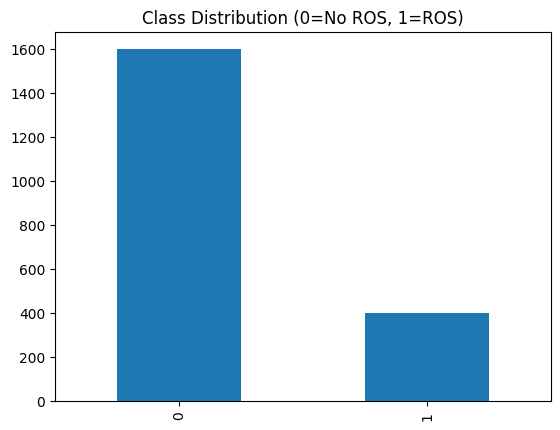

In [2]:
# eda_ros_vs_no_ros.ipynb

# 📌 1. Imports and Dataset Load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/processed/fake_aml_dataset_30_features.csv")

# Display basic info
df.info()
df["label_ros"].value_counts().plot(kind='bar', title='Class Distribution (0=No ROS, 1=ROS)')
plt.show()


In [3]:
# 📌 2. Descriptive Statistics Comparison

# Separate classes
df_ros = df[df["label_ros"] == 1]
df_noros = df[df["label_ros"] == 0]

# Compare means
mean_comparison = pd.concat([
    df_ros.describe().T["mean"],
    df_noros.describe().T["mean"]
], axis=1)
mean_comparison.columns = ["ROS_mean", "No_ROS_mean"]
mean_comparison["difference"] = mean_comparison["ROS_mean"] - mean_comparison["No_ROS_mean"]
mean_comparison.sort_values("difference", ascending=False)


,ROS_mean,No_ROS_mean,difference
tx_variance,352340.420047,88402.148248,263938.271799
monthly_volume_trend,15586.824005,22.383683,15564.440322
intl_avg_amount,1833.337558,987.559595,845.777963
avg_cash_amount,1744.874118,994.819808,750.054311
avg_tx_amount,1597.689397,994.172357,603.517040
burstiness,369.190095,63.753395,305.436700
tx_count_variance,369.190095,63.753395,305.436700
cash_tx_count,495.172500,271.316875,223.855625
total_tx_count,939.817500,773.230625,166.586875
counterparties_unique,934.255000,769.602500,164.652500


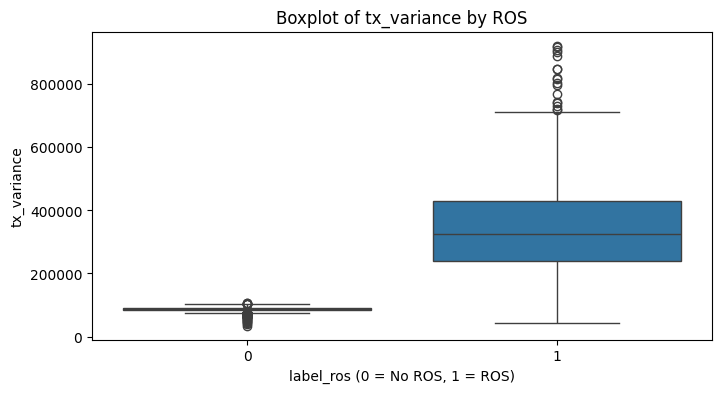

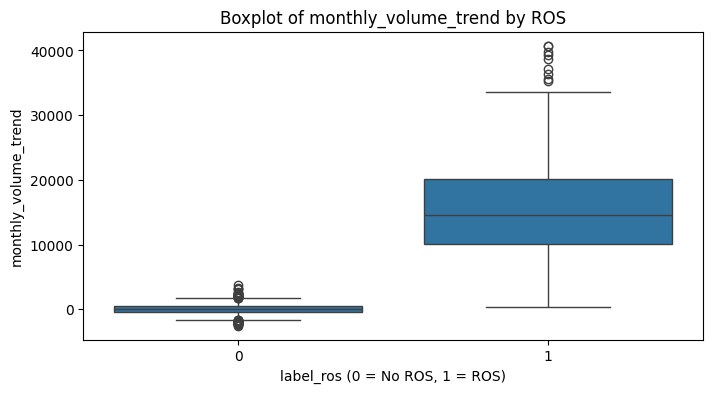

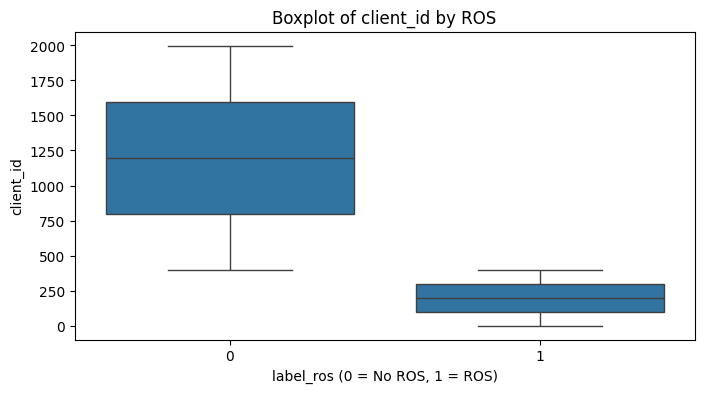

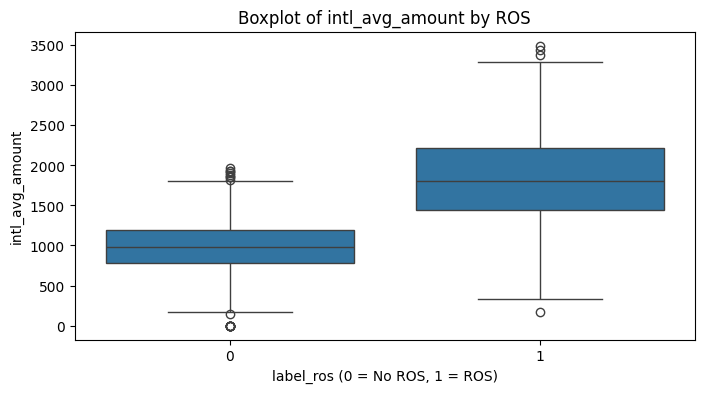

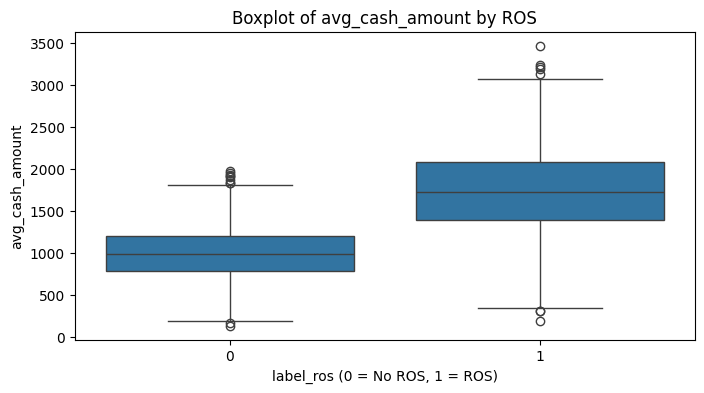

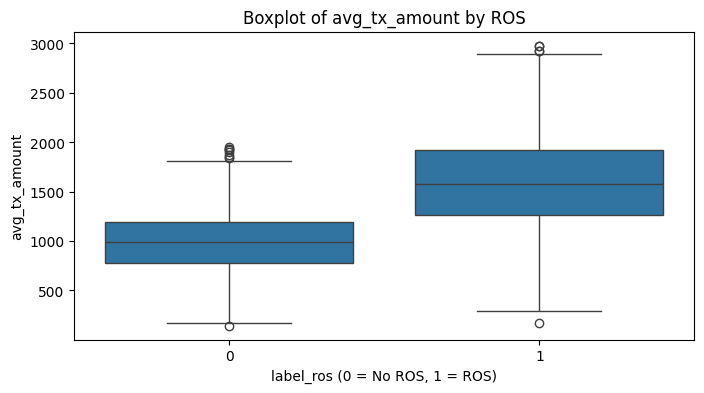

In [4]:
# 📌 3. Boxplots of Selected Features

top_diff_features = mean_comparison["difference"].abs().sort_values(ascending=False).head(6).index.tolist()

for col in top_diff_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="label_ros", y=col, data=df)
    plt.title(f"Boxplot of {col} by ROS")
    plt.xlabel("label_ros (0 = No ROS, 1 = ROS)")
    plt.show()


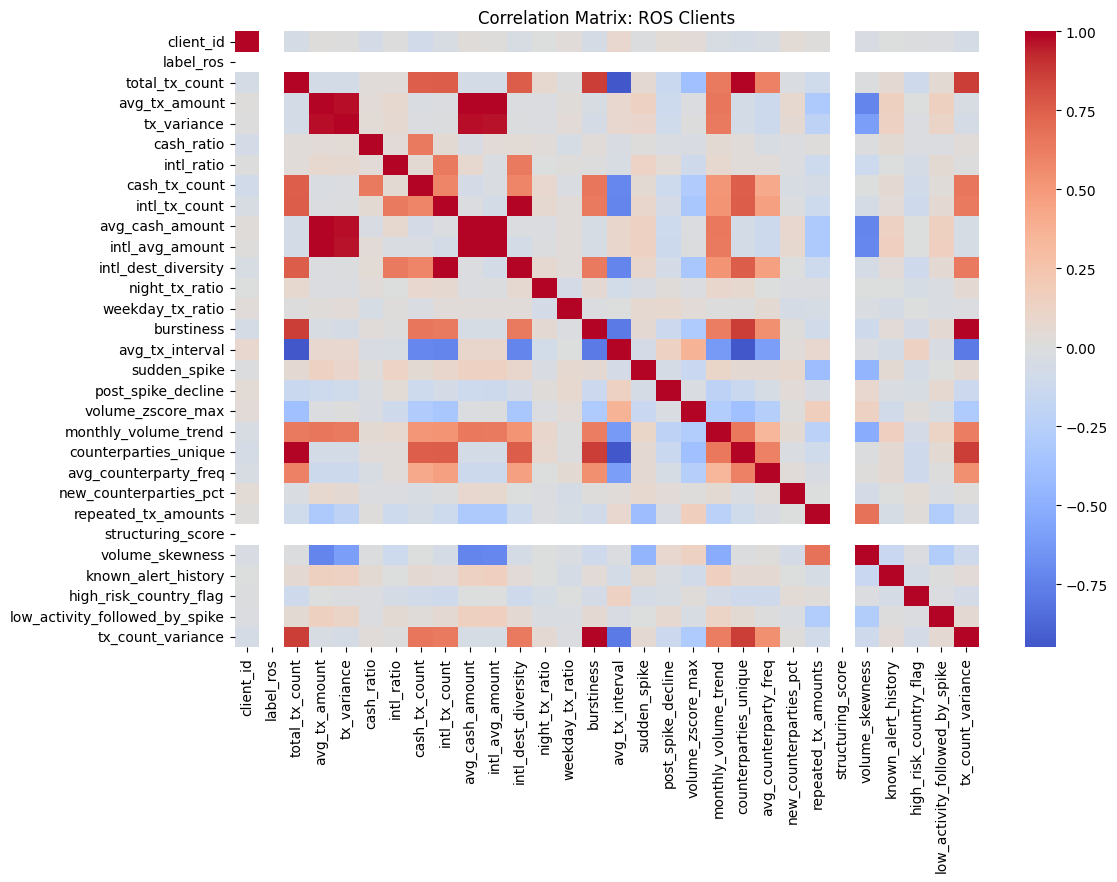

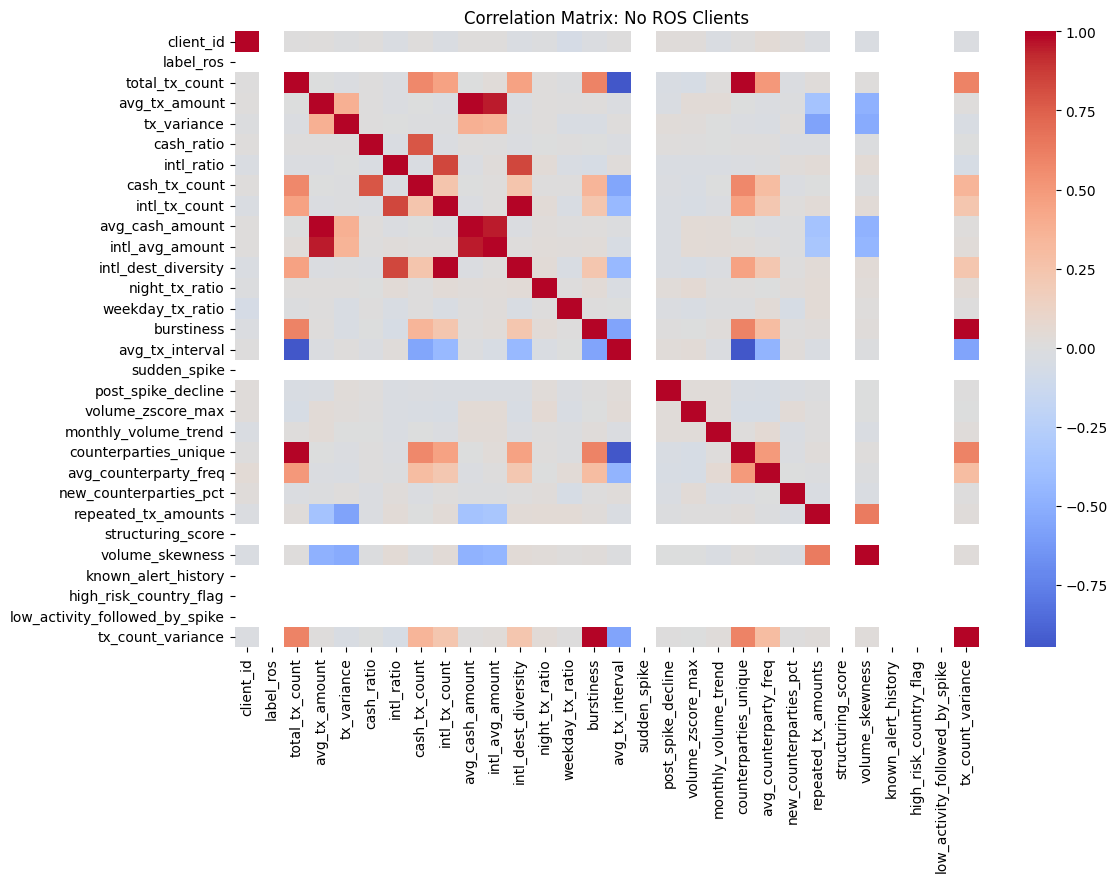

In [5]:
# 📌 4. Correlation Heatmaps

plt.figure(figsize=(12, 8))
corr_ros = df_ros.corr(numeric_only=True)
sns.heatmap(corr_ros, cmap="coolwarm", center=0)
plt.title("Correlation Matrix: ROS Clients")
plt.show()

plt.figure(figsize=(12, 8))
corr_noros = df_noros.corr(numeric_only=True)
sns.heatmap(corr_noros, cmap="coolwarm", center=0)
plt.title("Correlation Matrix: No ROS Clients")
plt.show()


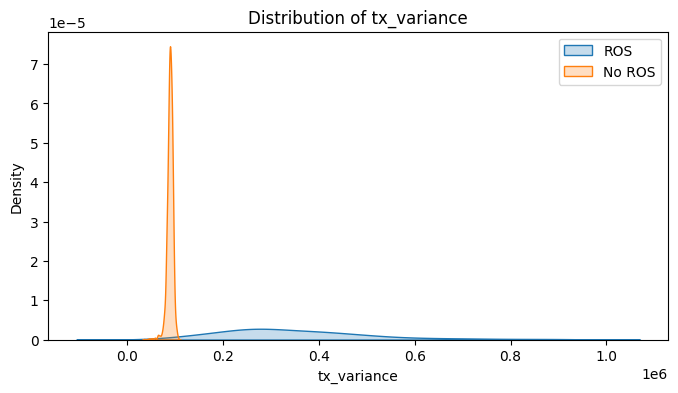

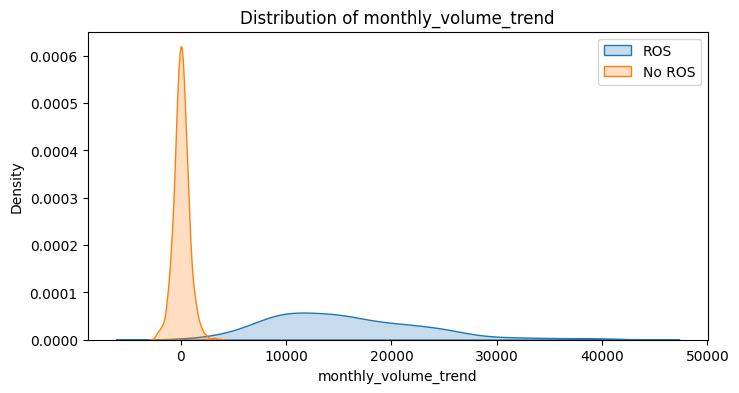

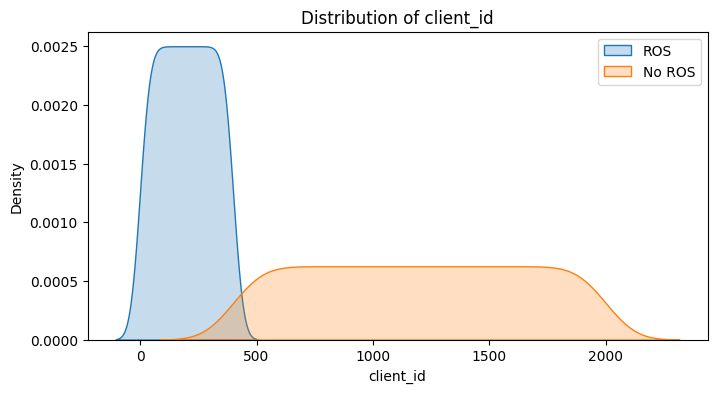

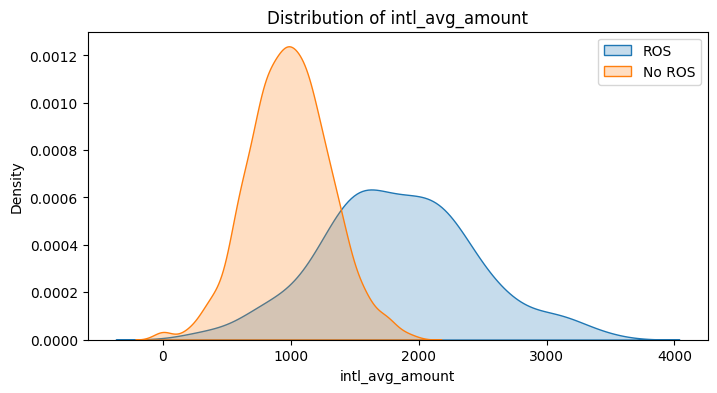

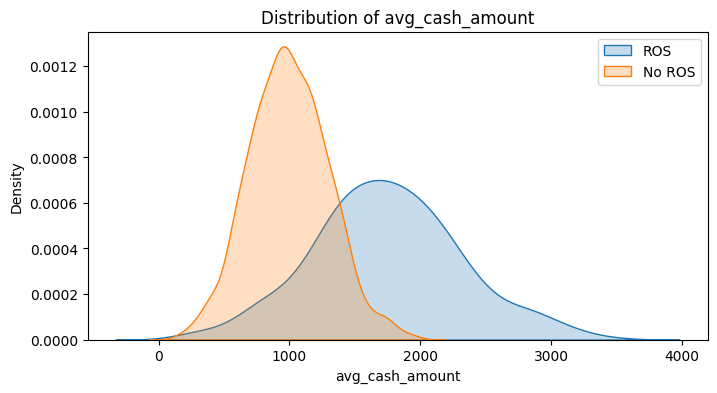

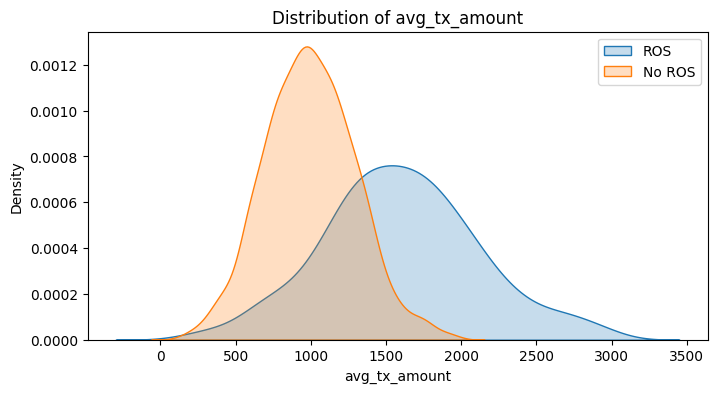

In [6]:
# 📌 5. Distribution Plots for Top Features

for col in top_diff_features:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df_ros[col], label="ROS", fill=True, common_norm=False)
    sns.kdeplot(df_noros[col], label="No ROS", fill=True, common_norm=False)
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()
